In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
%matplotlib inline
import numpy as np
import seaborn as sns
import time
import os
from __future__ import absolute_import , division , print_function
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [2]:
def model_running_time(start , end):
    hours = int((end-start)/3600)
    mins = int(((end-start)/60)%60)
    secs = int((end - start)%3600)
    print("Model Run Time: ")
    print(hours,":",mins,":",secs)
    return (hours,mins,secs)

In [3]:
train_dir = 'dataset/train/'
test_dir = 'dataset/test/'

In [4]:
## loading dataset

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='training')

validation_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


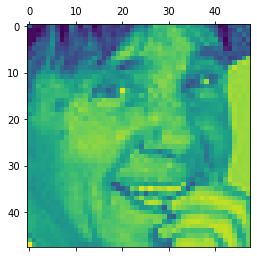

In [5]:
plt.matshow(training_set[0][0][0])

In [6]:
print( len(training_set) , len(training_set[0]) , len(training_set[0][0])) 

359 2 64


In [7]:
## labels
class_labels = training_set.class_indices
class_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
## create  a model
num_classes = 7
weight_decay = 1e-3

from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers

def create_emotion_detection_model_1():
    model = tf.keras.models.Sequential()

    model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(48,48,1)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation="linear"))
    model.add(Activation('elu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0003), metrics=['accuracy'])
    
    return model

In [18]:
## create  a model
num_classes = 7
weight_decay = 1e-3

def create_emotion_detection_model_2():
    model = keras.Sequential([
        keras.layers.Input(shape=(48,48,1)),
        keras.layers.Conv2D(filters=64 , kernel_size= (4,4), strides=(1,1) ,padding='valid' , kernel_regularizer=keras.regularizers.l2(weight_decay),activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        
        keras.layers.Conv2D( filters=128 , kernel_size=(4,4) , strides = (1,1) , padding='valid' , activation='relu' , kernel_regularizer=keras.regularizers.l2(weight_decay)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.MaxPooling2D(),
        
        keras.layers.Conv2D( filters = 128 , kernel_size=(4,4) , strides = (1,1) , padding='valid' , activation='relu' , kernel_regularizer=keras.regularizers.l2(weight_decay)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.MaxPooling2D(),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(units=256 , activation='relu'),
        keras.layers.Dense(units=128 , activation='relu'),
        keras.layers.Dense(units=128, activation='elu'),
        
        
        keras.layers.Dense(units=num_classes , activation='softmax')
    ])
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=Adam(0.0003), 
        metrics=['accuracy'])
    
    return model

In [10]:
checkpoint_path = 'saved_models/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [13]:
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_freq='epoch')

In [19]:
model = create_emotion_detection_model_2()

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 45, 45, 64)        1088      
                                                                 
 dropout_9 (Dropout)         (None, 45, 45, 64)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 45, 45, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 42, 42, 128)       131200    
                                                                 
 batch_normalization_10 (Bat  (None, 42, 42, 128)      512       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 42, 42, 128)      

In [21]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size

In [22]:
start = time.time()

model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=10,
                 callbacks=[cp_callback],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

end = time.time()

Epoch 1/10
358/358 [==============================] - 512s 1s/step - loss: 1.8528 - accuracy: 0.3583 - val_loss: 2.1590 - val_accuracy: 0.2198
Epoch 2/10
358/358 [==============================] - 507s 1s/step - loss: 1.5681 - accuracy: 0.4655 - val_loss: 1.7940 - val_accuracy: 0.4182
Epoch 3/10
358/358 [==============================] - 508s 1s/step - loss: 1.4187 - accuracy: 0.5192 - val_loss: 1.6868 - val_accuracy: 0.4858
Epoch 4/10
358/358 [==============================] - 508s 1s/step - loss: 1.3115 - accuracy: 0.5593 - val_loss: 1.8474 - val_accuracy: 0.4828
Epoch 5/10
358/358 [==============================] - 512s 1s/step - loss: 1.2196 - accuracy: 0.5944 - val_loss: 2.1650 - val_accuracy: 0.4428
Epoch 6/10
358/358 [==============================] - 510s 1s/step - loss: 1.1388 - accuracy: 0.6233 - val_loss: 1.6635 - val_accuracy: 0.5184
Epoch 7/10
358/358 [==============================] - 505s 1s/step - loss: 1.0498 - accuracy: 0.6581 - val_loss: 1.7935 - val_accuracy: 0.5063

In [23]:
_ = model_running_time(start,end)

Model Run Time: 
1 : 23 : 1398


In [24]:
new_model = create_emotion_detection_model_2()

In [25]:
new_model.load_weights(checkpoint_path)
new_model.evaluate(test_set)

113/113 [==============================] - 44s 392ms/step - loss: 2.0948 - accuracy: 0.5011


[2.09478497505188, 0.5011144876480103]

In [26]:
start = time.time()

new_model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=15,
                 callbacks=[cp_callback],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

end = time.time()

Epoch 1/15
123/358 [=========>....................] - ETA: 4:58 - loss: 0.6831 - accuracy: 0.8030

KeyboardInterrupt: 

In [27]:
new_model.evaluate(test_set)

113/113 [==============================] - 18s 163ms/step - loss: 1.7676 - accuracy: 0.5534


[1.7675926685333252, 0.5533574819564819]

In [28]:
start = time.time()

new_model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=5,
                 callbacks=[cp_callback],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

end = time.time()

Epoch 1/5
358/358 [==============================] - 440s 1s/step - loss: 0.6850 - accuracy: 0.7996 - val_loss: 2.0931 - val_accuracy: 0.5279
Epoch 2/5
358/358 [==============================] - 434s 1s/step - loss: 0.6059 - accuracy: 0.8318 - val_loss: 2.3704 - val_accuracy: 0.5154
Epoch 3/5
358/358 [==============================] - 435s 1s/step - loss: 0.5371 - accuracy: 0.8536 - val_loss: 2.6135 - val_accuracy: 0.4724
Epoch 4/5
358/358 [==============================] - 433s 1s/step - loss: 0.4885 - accuracy: 0.8729 - val_loss: 2.1998 - val_accuracy: 0.5409
Epoch 5/5
358/358 [==============================] - 490s 1s/step - loss: 0.4465 - accuracy: 0.8860 - val_loss: 2.3271 - val_accuracy: 0.5392


In [29]:
new_model.evaluate(test_set)

113/113 [==============================] - 21s 182ms/step - loss: 2.2610 - accuracy: 0.5461


[2.2610116004943848, 0.546113133430481]

In [33]:
new_model.history